# Clean Df_main

In [2]:
import pandas as pd
from prophet import Prophet

/home/emilien/.pyenv/versions/favorita/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [42]:
path = 'Data/df_main.csv'
df = pd.read_csv(path)

In [43]:
df['is_holiday']

0    2747118
1     260700
2        462
Name: is_holiday, dtype: int64

In [4]:
df.drop(columns='Unnamed: 0', inplace=True)

In [5]:
df['dcoilwtico'].fillna(method = 'ffill', inplace = True)
df['dcoilwtico'].fillna(method = 'bfill', inplace = True)
df

,id,date,store_nbr,family,sales,onpromotion,city_x,state,type_x,cluster,is_holiday,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,1,93.14
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,1,93.14
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,1,93.14
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,1,93.14
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,1,93.14
...,...,...,...,...,...,...,...,...,...,...,...,...
3008275,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,0,47.57
3008276,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,0,47.57
3008277,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,0,47.57
3008278,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,0,47.57


In [6]:
df.to_csv('Data/df_main_V2.csv')

# Get df_store_1

In [7]:
df_store_2 = df[df['store_nbr']==2]
df_store_2_produce = df_store_2[df_store_2['family']=='PRODUCE']

In [9]:
df_store_2_produce_train = df_store_2_produce[df_store_2_produce['date']<'2017-04-01']
df_store_2_produce_train

,id,date,store_nbr,family,sales,onpromotion,city_x,state,type_x,cluster,is_holiday,dcoilwtico
393,393,2013-01-01,2,PRODUCE,0.000,0,Quito,Pichincha,D,13,1,93.14
2175,2175,2013-01-02,2,PRODUCE,0.000,0,Quito,Pichincha,D,13,0,93.14
3957,3957,2013-01-03,2,PRODUCE,0.000,0,Quito,Pichincha,D,13,0,92.97
5739,5739,2013-01-04,2,PRODUCE,0.000,0,Quito,Pichincha,D,13,0,93.12
7521,7521,2013-01-05,2,PRODUCE,0.000,0,Quito,Pichincha,D,13,1,93.12
...,...,...,...,...,...,...,...,...,...,...,...,...
2755629,2748237,2017-03-27,2,PRODUCE,2470.051,0,Quito,Pichincha,D,13,0,47.02
2757411,2750019,2017-03-28,2,PRODUCE,2028.243,0,Quito,Pichincha,D,13,0,48.36
2759193,2751801,2017-03-29,2,PRODUCE,3606.152,208,Quito,Pichincha,D,13,0,49.47
2760975,2753583,2017-03-30,2,PRODUCE,1908.637,1,Quito,Pichincha,D,13,0,50.30


In [10]:
df_store_2_produce_test = df_store_2_produce[(df_store_2_produce['date']>='2017-04-01')&((df_store_2_produce['date']<'2017-07-01'))]
df_store_2_produce_test.reset_index(drop=True, inplace=True)

In [11]:
df_store_2_produce_test

,id,date,store_nbr,family,sales,onpromotion,city_x,state,type_x,cluster,is_holiday,dcoilwtico
0,2757147,2017-04-01,2,PRODUCE,4134.3490,1,Quito,Pichincha,D,13,0,50.54
1,2758929,2017-04-02,2,PRODUCE,3833.9060,1,Quito,Pichincha,D,13,0,50.54
2,2760711,2017-04-03,2,PRODUCE,2136.6570,1,Quito,Pichincha,D,13,0,50.25
3,2762493,2017-04-04,2,PRODUCE,2161.1240,2,Quito,Pichincha,D,13,0,50.99
4,2764275,2017-04-05,2,PRODUCE,3629.4841,216,Quito,Pichincha,D,13,0,51.14
...,...,...,...,...,...,...,...,...,...,...,...,...
86,2910399,2017-06-26,2,PRODUCE,2454.5490,1,Quito,Pichincha,D,13,0,43.24
87,2912181,2017-06-27,2,PRODUCE,1954.7470,1,Quito,Pichincha,D,13,0,44.25
88,2913963,2017-06-28,2,PRODUCE,3193.4250,208,Quito,Pichincha,D,13,0,44.74
89,2915745,2017-06-29,2,PRODUCE,1770.8960,10,Quito,Pichincha,D,13,0,44.88


In [12]:
df_store_2_produce_train = df_store_2_produce_train[['date', 'sales']]

In [13]:
df_store_2_produce_train.rename(columns={'date': 'ds', 'sales':'y'}, inplace=True)
df_store_2_produce_train.reset_index(drop=True, inplace=True)

/tmp/ipykernel_26024/2737423942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_store_2_produce_train.rename(columns={'date': 'ds', 'sales':'y'}, inplace=True)


<AxesSubplot: >

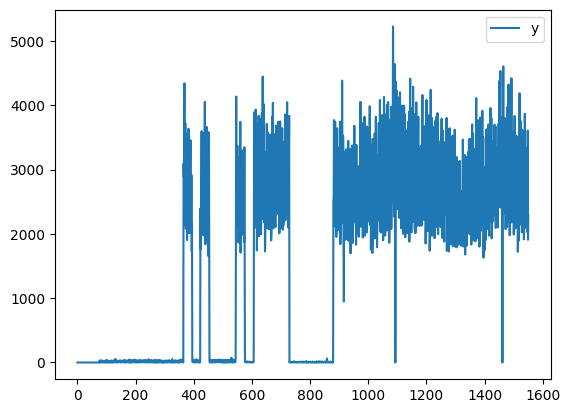

In [25]:
df_store_2_produce_train.plot()

# Prophet model

In [15]:
m=Prophet()
m.fit(df_store_2_produce_train)
future = m.make_future_dataframe(periods=91)
forecast = m.predict(future)

12:20:20 - cmdstanpy - INFO - Chain [1] start processing
12:20:21 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,-134.802027,-992.073073,1082.194520,-134.802027,-134.802027,129.648405,129.648405,129.648405,-275.440013,-275.440013,-275.440013,405.088419,405.088419,405.088419,0.0,0.0,0.0,-5.153621
1,2013-01-02,-132.642952,-424.524872,1938.887761,-132.642952,-132.642952,896.104101,896.104101,896.104101,499.264968,499.264968,499.264968,396.839133,396.839133,396.839133,0.0,0.0,0.0,763.461150
2,2013-01-03,-130.483877,-1228.407562,1002.516611,-130.483877,-130.483877,2.669731,2.669731,2.669731,-385.640601,-385.640601,-385.640601,388.310332,388.310332,388.310332,0.0,0.0,0.0,-127.814145
3,2013-01-04,-128.324802,-1151.873278,1157.964891,-128.324802,-128.324802,129.803377,129.803377,129.803377,-249.808961,-249.808961,-249.808961,379.612338,379.612338,379.612338,0.0,0.0,0.0,1.478575
4,2013-01-05,-126.165727,-798.922794,1593.199785,-126.165727,-126.165727,525.019075,525.019075,525.019075,154.181729,154.181729,154.181729,370.837346,370.837346,370.837346,0.0,0.0,0.0,398.853348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,2017-06-26,2624.550281,1377.826265,3598.511679,2603.596319,2646.002642,-83.512665,-83.512665,-83.512665,-142.385768,-142.385768,-142.385768,58.873102,58.873102,58.873102,0.0,0.0,0.0,2541.037616
1634,2017-06-27,2624.084405,1274.254803,3533.775165,2602.841389,2646.176172,-197.848671,-197.848671,-197.848671,-275.440013,-275.440013,-275.440013,77.591342,77.591342,77.591342,0.0,0.0,0.0,2426.235734
1635,2017-06-28,2623.618529,2054.556008,4421.401280,2602.118225,2646.310320,597.327741,597.327741,597.327741,499.264968,499.264968,499.264968,98.062772,98.062772,98.062772,0.0,0.0,0.0,3220.946270
1636,2017-06-29,2623.152653,1243.232632,3490.426128,2601.221519,2646.482895,-265.352931,-265.352931,-265.352931,-385.640601,-385.640601,-385.640601,120.287670,120.287670,120.287670,0.0,0.0,0.0,2357.799722


In [17]:
forecast_only = forecast[forecast['ds']>='2017-04-01']
forecast_only = forecast_only[['ds', 'yhat']]
forecast_only.reset_index(drop=True, inplace=True)

# Assess the performance of the baseline

In [18]:
def MAPE(y_hat, y):
    """Compute the MAPE between two vectors: our prediction and the actual value"""
    return sum(abs((y_hat-y)/y))

In [19]:
MAPE(forecast_only['yhat'], df_store_2_produce_test['sales'])

17.056936417235345

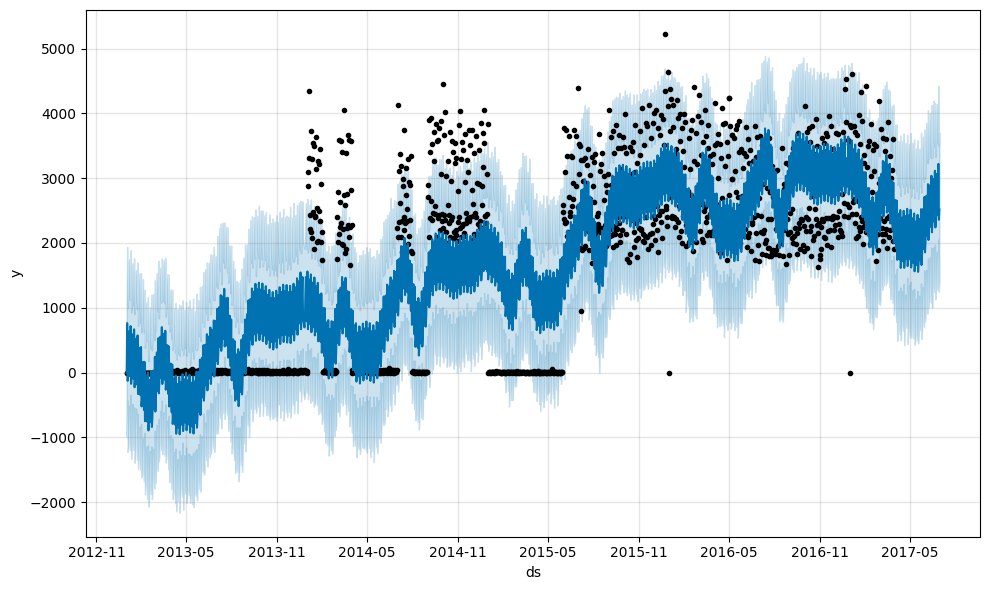

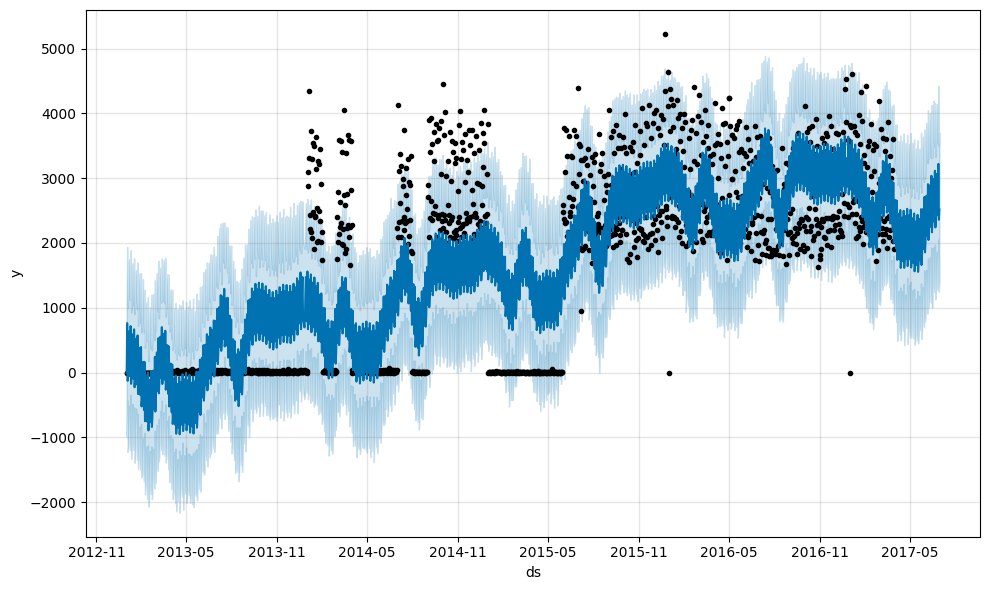

In [23]:
m.plot(forecast)

# Create a function to drop and rename columns

In [26]:
def drop_rename_columns(df):
    """Keep only useful columns for Prophet forecast"""
    df = df[['date', 'sales']]
    df.rename(columns={'date': 'ds', 'sales':'y'}, inplace=True)
    return df

In [27]:
df_store_3 = df[df['store_nbr']==3]
df_store_3_produce = df_store_3[df_store_3['family']=='PRODUCE']

In [28]:
df_store_3_produce

,id,date,store_nbr,family,sales,onpromotion,city_x,state,type_x,cluster,is_holiday,dcoilwtico
756,756,2013-01-01,3,PRODUCE,0.0000,0,Quito,Pichincha,D,8,1,93.14
2538,2538,2013-01-02,3,PRODUCE,0.0000,0,Quito,Pichincha,D,8,0,93.14
4320,4320,2013-01-03,3,PRODUCE,0.0000,0,Quito,Pichincha,D,8,0,92.97
6102,6102,2013-01-04,3,PRODUCE,0.0000,0,Quito,Pichincha,D,8,0,93.12
7884,7884,2013-01-05,3,PRODUCE,0.0000,0,Quito,Pichincha,D,8,1,93.12
...,...,...,...,...,...,...,...,...,...,...,...,...
3000126,2992734,2017-08-11,3,PRODUCE,6906.5430,9,Quito,Pichincha,D,8,1,48.81
3001908,2994516,2017-08-12,3,PRODUCE,7249.2890,7,Quito,Pichincha,D,8,0,48.81
3003690,2996298,2017-08-13,3,PRODUCE,8017.7603,7,Quito,Pichincha,D,8,0,48.81
3005472,2998080,2017-08-14,3,PRODUCE,7941.8730,8,Quito,Pichincha,D,8,0,47.59


In [32]:
df_store_3_produce = drop_rename_columns(df_store_3_produce)
df_store_3_produce

/tmp/ipykernel_26024/942648150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'date': 'ds', 'sales':'y'}, inplace=True)


,ds,y
756,2013-01-01,0.0000
2538,2013-01-02,0.0000
4320,2013-01-03,0.0000
6102,2013-01-04,0.0000
7884,2013-01-05,0.0000
...,...,...
3000126,2017-08-11,6906.5430
3001908,2017-08-12,7249.2890
3003690,2017-08-13,8017.7603
3005472,2017-08-14,7941.8730


# Create a function to split train and test datasets 

In [31]:
def split_train_test(df):
    """split a dataframe to have train and test value"""
    df_train = df[df['ds']<'2017-04-01']
    df_train.reset_index(drop = True, inplace = True)
    df_test = df[(df['ds']>='2017-04-01')&(df['ds']<'2017-07-01')]
    df_test.reset_index(drop = True, inplace = True)
    return (df_train, df_test)

In [40]:
df_store_3_produce_train=split_train_test(df_store_3_produce)[0]
df_store_3_produce_train

,ds,y
0,2013-01-01,0.0000
1,2013-01-02,0.0000
2,2013-01-03,0.0000
3,2013-01-04,0.0000
4,2013-01-05,0.0000
...,...,...
1546,2017-03-27,7561.1510
1547,2017-03-28,6758.6777
1548,2017-03-29,11569.5870
1549,2017-03-30,6053.4960


# Create a function to make a Prophet forecast

In [35]:
def forecast_with_Prophet(df_train):
    m=Prophet()
    m.fit(df_train)
    future = m.make_future_dataframe(periods=91)
    forecast = m.predict(future)
    return forecast

In [45]:
df_store_3_produce_forecast=forecast_with_Prophet(df_store_3_produce_train)

12:52:51 - cmdstanpy - INFO - Chain [1] start processing
12:52:51 - cmdstanpy - INFO - Chain [1] done processing


# Create a function that compute the MAPE of the forecast

In [50]:
def MAPE_of_forecast(forecast, df_test):
    forecast_only = forecast[(forecast['ds']>='2017-04-01')&(forecast['ds']<'2017-07-01')]
    forecast_only.reset_index(drop = True, inplace = True)
    return MAPE(forecast_only['yhat'], df_test['y'])

In [47]:
split_train_test(df_store_3_produce)[1]['y']

0     13351.888
1      9200.826
2      7199.398
3      6975.542
4     11731.458
        ...    
86     7499.816
87     6540.955
88    10902.155
89     5882.375
90     7392.898
Name: y, Length: 91, dtype: float64

In [51]:
MAPE_of_forecast(df_store_3_produce_forecast, split_train_test(df_store_3_produce)[1])

15.465062331635671

# Create a function that gathers all the other

In [52]:
def get_baseline_score(df):
    clean_df = drop_rename_columns(df)
    df_train=split_train_test(clean_df)[0]
    df_test=split_train_test(clean_df)[1]
    forecast=forecast_with_Prophet(df_train)
    return MAPE_of_forecast(forecast, df_test)

In [57]:
df_store_3 = df[df['store_nbr']==3]
df_store_3_produce = df_store_3[df_store_3['family']=='PRODUCE']

In [58]:
df_store_4 = df[df['store_nbr']==4]
df_store_4_produce = df_store_4[df_store_4['family']=='PRODUCE']

In [56]:
df_store_2_produce

,id,date,store_nbr,family,sales,onpromotion,city_x,state,type_x,cluster,is_holiday,dcoilwtico
393,393,2013-01-01,2,PRODUCE,0.0000,0,Quito,Pichincha,D,13,1,93.14
2175,2175,2013-01-02,2,PRODUCE,0.0000,0,Quito,Pichincha,D,13,0,93.14
3957,3957,2013-01-03,2,PRODUCE,0.0000,0,Quito,Pichincha,D,13,0,92.97
5739,5739,2013-01-04,2,PRODUCE,0.0000,0,Quito,Pichincha,D,13,0,93.12
7521,7521,2013-01-05,2,PRODUCE,0.0000,0,Quito,Pichincha,D,13,1,93.12
...,...,...,...,...,...,...,...,...,...,...,...,...
2999763,2992371,2017-08-11,2,PRODUCE,2028.7040,8,Quito,Pichincha,D,13,1,48.81
3001545,2994153,2017-08-12,2,PRODUCE,2159.9400,9,Quito,Pichincha,D,13,0,48.81
3003327,2995935,2017-08-13,2,PRODUCE,2476.7031,8,Quito,Pichincha,D,13,0,48.81
3005109,2997717,2017-08-14,2,PRODUCE,2104.0650,7,Quito,Pichincha,D,13,0,47.59


In [60]:
get_baseline_score(df_store_2_produce)

/tmp/ipykernel_26024/942648150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'date': 'ds', 'sales':'y'}, inplace=True)
14:13:08 - cmdstanpy - INFO - Chain [1] start processing
14:13:08 - cmdstanpy - INFO - Chain [1] done processing


17.056936417235345

In [61]:
get_baseline_score(df_store_3_produce)

/tmp/ipykernel_26024/942648150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'date': 'ds', 'sales':'y'}, inplace=True)
14:13:19 - cmdstanpy - INFO - Chain [1] start processing
14:13:19 - cmdstanpy - INFO - Chain [1] done processing


15.465062331635671

In [62]:
get_baseline_score(df_store_4_produce)

/tmp/ipykernel_26024/942648150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'date': 'ds', 'sales':'y'}, inplace=True)
14:13:24 - cmdstanpy - INFO - Chain [1] start processing
14:13:24 - cmdstanpy - INFO - Chain [1] done processing


15.81586162934549